In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("archive1/House_Rent_Dataset.csv")

print(df.columns)
print(df.head())
print(df.isnull().sum())


Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
categorical_cols = ['BHK', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.dropna(inplace=True)

x = df.drop('Rent', axis=1)
y = df['Rent']
selected_features = ['BHK', 'Size','Floor', 'Area Type', 'Furnishing Status', 'Bathroom']

X = df[selected_features]
X = X.copy()

X['Floor'] = X['Floor'].apply(lambda x: 0 if 'Ground' in x else (int(x.split()[0]) if x.split()[0].isdigit() else None))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=20)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (949, 6) (949,)
Testing set shape: (3797, 6) (3797,)


In [35]:

from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

train_predictions = model.predict(X_train_imputed)
test_predictions = model.predict(X_test_imputed)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2 score:", train_r2)
print("Testing R^2 score:", test_r2)

Training MSE: 15301447137.973003
Testing MSE: 1983380012.9778047
Training R^2 score: 0.13284050732219732
Testing R^2 score: 0.38194928748495227


In [37]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
print(results.head())



      Actual      Predicted
1907   11000   -3887.814216
354     6500   -7469.810909
4047   26000   98548.234129
998    75000   33747.196537
3962   65000  115374.024505


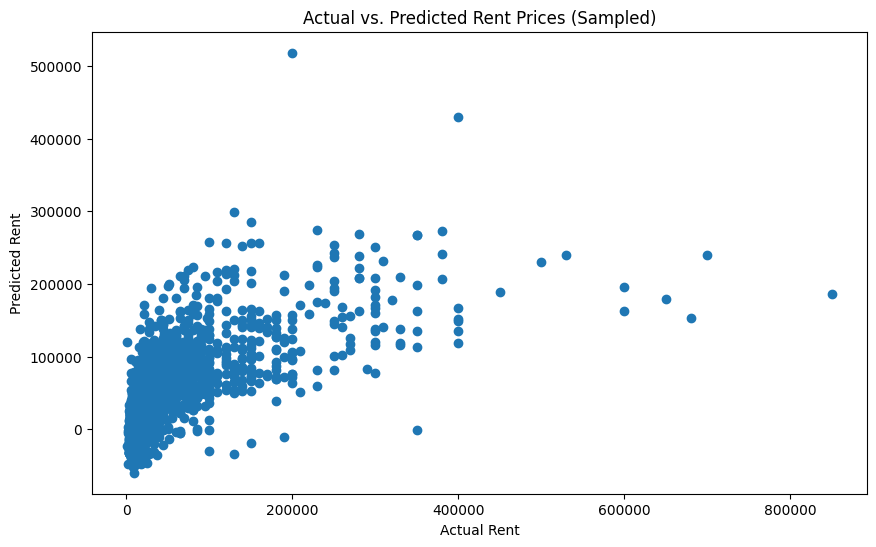

In [44]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs. Predicted Rent Prices (Sampled)')
plt.show()
